# 4-7 상자수염 그래프

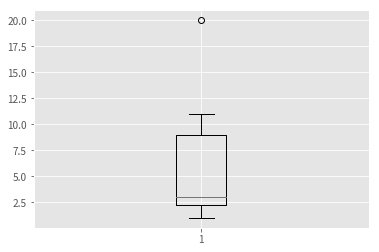

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

x = [1, 2, 3, 3, 11, 20]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(x)

plt.show()

여러개의 boxplot을 그리는 경우

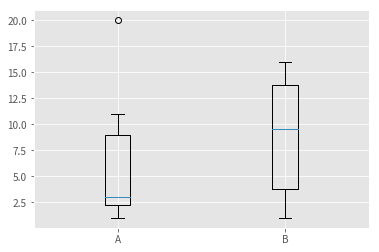

In [3]:
# 복수의 리스트를 리스트에 세트
x = [[1,2,3,3,11,20],[1,2,9,10,15,16]]
labels = ['A','B']

fig = plt.figure()
ax =fig.add_subplot(111)

# 데이터와 레이블 지정
ax.boxplot(x, labels=labels)

plt.show()

상자수염 그래프 활용하기

In [4]:
import os
import pandas as pd

base_url = 'https://raw.githubusercontent.com/practical-jupyter/sample-data/master/anime/'
anime_master_csv = os.path.join(base_url, 'anime_master.csv')

df = pd.read_csv(anime_master_csv, index_col='anime_id')
df.head()

,name,genre,type,episodes,rating,members
anime_id,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
9969,Gintama',"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


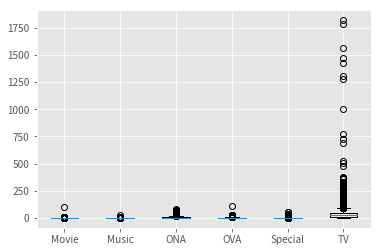

In [15]:
# 배급종별마다의 에피소드 수 시각화
labels = []
types_list = []

# 배급종별마다의 에피소드수 정보를 리스트화
for label, df_per_type in df.groupby('type'):
    labels.append(label)
    types_list.append(df_per_type['episodes'].tolist())
    
fig = plt.figure()
ax = fig.add_subplot(111)

ax.boxplot(types_list, labels=labels)

plt.show()

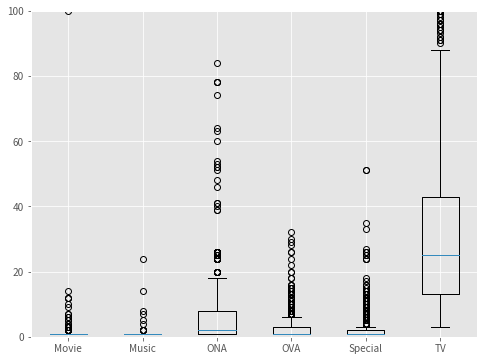

In [18]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.boxplot(types_list, labels=labels)

# Y축 그리기 버뮈를 0부터 100까지 한정
ax.set_ylim(0,100)

plt.show()

사부위점의 구체적인 값을 알고 싶다면
 - df.describe()를 활용

In [19]:
df['episodes'][df['type']=='TV'].describe().round(1)

count    3330.0
mean       37.5
std        83.3
min         3.0
25%        13.0
50%        25.0
75%        43.0
max      1818.0
Name: episodes, dtype: float64

## 상자수염 그래프의 서식 일괄 적용하기
### 주요서식 설정항목
1. color 색
2. facecolor 채움색
3. linestyle 선종류
4. maker 마카
5. makerfacecolor 마카 채움색
6. makeredgecolor 마카 테두리선 색
7. makersize 마카 크기


### 데이터 세트 작성

In [20]:
import numpy as np

np.random.seed(3)
dataset = [np.random.normal(20 + mu, 5, 1000) for mu in range(1, 5)]

### 서식 사전 만들기

In [21]:
# 벗어난 값의 서식 사전
flierprop = {"color": "#EC407A",
             "marker": "o",
             "markerfacecolor": "#2196F3",
             "markeredgecolor": "white",
             "markersize": 5,
             "linestyle": "None",
             "linewidth": 0.1}
# 상자의 서식사전
boxprop = {"color": "#2196F3", 
           "facecolor": "#BBDEFB", 
           "linewidth": 1, 
           "linestyle": "-"}
# 수염의 서식사전
whiskerprop = {"color": "#2196F3", 
               "linewidth": 1, 
               "linestyle": "--"}
# 수염 끝단 서식 사전
capprop = {"color": "#2196F3", 
           "linewidth": 1, 
           "linestyle": ":"}
# 중앙값 서식사전
medianprop = {"color": "#2196F3", 
              "linewidth": 2, 
              "linestyle": "-"}
# 평균값 서식사전
meanprop = {"color": "#2196F3",
            "marker": "^",
            "markerfacecolor": "#2196F3",
            "markeredgecolor": "white",
            "markersize": 10,
            "linewidth": 1,
            "linestyle": ""}

### 그리기

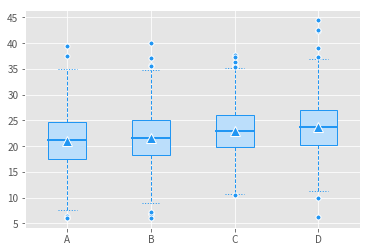

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.boxplot(dataset,
            patch_artist = 'Patch', # 서식을 설정하는 경우 'Patch'를 선택
            labels=['A','B','C','D'], # 항목 레이블
            showmeans=True, # 평균값 그리기
            flierprops=flierprop, # 벗어난 값 서식설정
            boxprops=boxprop, # 상자 서식설정
            whiskerprops=whiskerprop, # 수염 서식설정
            capprops=capprop, # 수염 끝단 서식설정
            medianprops=medianprop, # 중앙값 서식설정
            meanprops=meanprop) # 평균값 서식설정
            
plt.show()

## 상자마다 서식 설정하기
상자마다 서식을 개별로 설정하는 것도 가능하다. 접두다 set_ 를 붙여서 사용한다.
- 그림그리기
- 상자요소 수와 같은 요소 수의 색 세트(컬러세트) (colors1, colors2) 작성
- 위쪽과 아래쪽이 나눠져 있는 요소의 서식 설정용에 수열 리스트 n을 작성하기
- 상자와 벗어난 값, 중앙값의 서식 설정
- 수염과 수염의 끝단 의 서식설정하기
- 평균값의 서식 설정하기

[<matplotlib.patches.PathPatch object at 0x000002B60AD5A668>, <matplotlib.patches.PathPatch object at 0x000002B60AD6D048>, <matplotlib.patches.PathPatch object at 0x000002B60AD78A20>, <matplotlib.patches.PathPatch object at 0x000002B60AD8A438>]


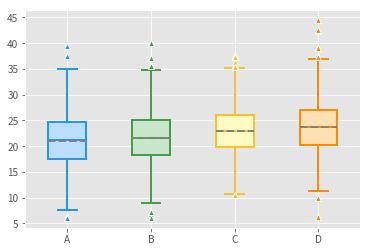

In [29]:
# 그림그리기
fig = plt.figure()
ax = fig.add_subplot(111)

bp = ax.boxplot(dataset, patch_artist='Patch', labels=['A','B','C','D'],
               meanline=True, showmeans=True)

print(bp['boxes'])
# 컬러 세트
colors1 = ["#2196F3", "#43A047", "#FBC02D", "#FB8C00"]
colors2 = ["#BBDEFB", "#C8E6C9", "#FFF9C4", "#FFE0B2"]

# 위아래로 나뉘어진 요소에 설정하기 위해 용도의 수열
n = [0,0,1,1,2,2,3,3]

# 서식 설정
# 상자와 벗어난 값, 중앙값의 서식 설정
for params in zip(bp['boxes'],
                  bp['fliers'],
                  bp['medians'],
                  colors1,
                  colors2):
    bpb, bpf, med, color1, color2 = params
    # 상자 서식 설정
    bpb.set_color(color1)
    bpb.set_facecolor(color2)
    bpb.set_linewidth(2)
    
    # 벗어난 값 서식 설정
    bpf.set(marker='^', color=color2)
    bpf.set_markeredgecolor("white")
    bpf.set_markerfacecolor(color1)
    
    # 중앙값 서식 설정
    med.set_color(color1)
    med.set_linewidth(2)
    
# 수염과 수염 끝단 서식 설정
for bpc, bpw, m in zip(bp['caps'], bp['whiskers'],n):
    bpc.set_color(colors1[m])
    bpc.set_linewidth(2)
    bpw.set_color(colors1[m])
    bpw.set_linewidth(2)
    
# 평균값 서식 설정
for mean, color2 in zip(bp['means'], colors2):
    mean.set_color('grey')
    mean.set_linewidth(2)
    mean.set_linestyle('--')
    
plt.show()